<a href="https://colab.research.google.com/github/THANHDAT202/CNN/blob/main/CNN_Van_tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

import tensorflow as tf

from keras.models import load_model

from keras.utils import load_img

from keras.utils import img_to_array

from keras.optimizers import SGD,Adam

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.utils import np_utils

from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization

from keras.layers import Flatten

from keras.optimizers import RMSprop

from keras.utils import to_categorical

from keras.layers.convolutional import Conv2D

from keras.layers.convolutional import MaxPooling2D

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
trainset='/content/drive/MyDrive/BT1/Tuong_lai'

train_dataset=data_generator.flow_from_directory(trainset,target_size=(100,100),batch_size=128,class_mode='categorical',subset="training",shuffle=True,)

validation_set=data_generator.flow_from_directory(trainset,target_size=(100,100),batch_size=128,class_mode='categorical',subset="validation",shuffle=True)


Found 105 images belonging to 5 classes.
Found 9 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))

model.add(Dropout(0.2))

model.add(Dense(5,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
validation_set.class_indices



{'Tuong lai binh thuong': 0,
 'Tuong lai giau': 1,
 'Tuong lai hanh phuc': 2,
 'Tuong lai kho khan': 3,
 'Tuong lai kho tam': 4}

In [ ]:
train=model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
1/1 [==============================] - 25s 25s/step - loss: 2.0372 - acc: 0.2857 - val_loss: 17.0124 - val_acc: 0.1111
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 15.0608 - acc: 0.1714 - val_loss: 2.2751 - val_acc: 0.1111
Epoch 3/50
1/1 [==============================] - 9s 9s/step - loss: 2.3183 - acc: 0.1714 - val_loss: 1.6204 - val_acc: 0.2222
Epoch 4/50
1/1 [==============================] - 9s 9s/step - loss: 1.6408 - acc: 0.1905 - val_loss: 1.5760 - val_acc: 0.2222
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 1.6029 - acc: 0.2000 - val_loss: 1.5580 - val_acc: 0.3333
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 1.5855 - acc: 0.2857 - val_loss: 1.5561 - val_acc: 0.3333
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 1.5722 - acc: 0.2952 - val_loss: 1.5572 - val_acc: 0.3333
Epoch 8/50
1/1 [==============================] - 5s 5s/step - loss: 1.5673 - acc: 0.2952 - val_loss: 1.568

In [ ]:
test_loss,test_acc = model.evaluate(train_dataset)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)


1/1 [==============================] - 4s 4s/step - loss: 0.2398 - acc: 0.8952
độ chính xác trên tập kiểm tra 0.8952381014823914
hàm mất mát trên tập kiểm ta 0.23976196348667145


In [ ]:
#lưu
from keras.models import load_model
model.save("van_tay(CNN).h5")
model_1=load_model('van_tay(CNN).h5')


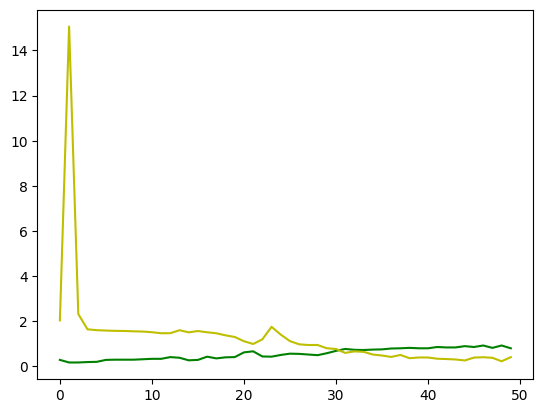

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['acc']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()


Saving tay5.jpeg to tay5.jpeg
1/1 [==============================] - 0s 21ms/step
[[1. 0. 0. 0. 0.]]
Giá trị dự đoán:  Tuong lai binh thuong


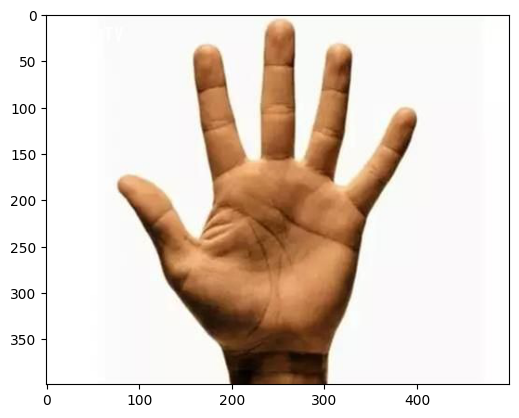

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=load_img(path,target_size=(100,100))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  label=['Tuong lai binh thuong',
 'Tuong lai giau',
 'Tuong lai hanh phuc',
 'Tuong lai kho khan',
 'Tuong lai kho tam' ]
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])